# Problem Statement:

### How good is player X against CSK in Chepauk when they’re playing 3 spinners?

Apart from career statistics (matches/runs/avg/sr) What information can be derived from a player’s historic data?

Strengths & Weaknesses against bowling types

His contribution to team’s win

Performance against specific opposition


# Topics Involved:



*   Player Analysis:
    * Player-level statistics --- (runs/sr/RPI/BPB)
    * Type of player --- (anchor/strike-rotator/hitter)  
    * Performance in diff phases of play --- (PP/Middle/Death)
    * Performance by innings --- (Bat 1st/2nd)

*   Team Analysis:
    * Performance against oppositions --- (RPI/SR)

*   Venue Analysis:
    * Performance in venues
    * Toss factor
    * Venue type --- (runrates, wickets, ..)













In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
#to display all rows columns
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.expand_frame_repr', False)
pd.set_option('max_colwidth', 0)

In [ ]:
Deliveries = pd.read_csv('/content/deliveries_updated_mens_ipl.csv')
Matches = pd.read_csv('/content/matches_updated_mens_ipl.csv')

In [ ]:
Deliveries.head(2)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,total_runs,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
Matches.tail(2)

,outcome,event,date,gender,reserve_umpire,team1,toss_winner,umpire2,match_referee,season,team2,winner_runs,balls_per_over,player_of_match,date1,neutralvenue,venue,method,toss_decision,city,tv_umpire,date2,winner,umpire1,match_number,eliminator,winner_wickets,matchId
948,NaN,Indian Premier League,27-05-2016,male,Navdeep Singh,Gujarat Lions,Sunrisers Hyderabad,CK Nandan,RS Mahanama,2016,Sunrisers Hyderabad,NaN,6,DA Warner,NaN,NaN,Feroz Shah Kotla,NaN,field,Delhi,C Shamshuddin,NaN,Sunrisers Hyderabad,M Erasmus,NaN,NaN,4.0,981017
949,NaN,Indian Premier League,29-05-2016,male,A Deshmukh,Royal Challengers Bangalore,Sunrisers Hyderabad,BNJ Oxenford,RS Madugalle,2016,Sunrisers Hyderabad,8.0,6,BCJ Cutting,NaN,NaN,M Chinnaswamy Stadium,NaN,bat,Bangalore,AK Chaudhary,NaN,Sunrisers Hyderabad,HDPK Dharmasena,NaN,NaN,NaN,981019


In [ ]:
Deliveries.rename(columns={"batsman": "Batsman"}, inplace=True)

In [ ]:
Deliveries.head(2)

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,Batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,total_runs,Penalty,dismissal_kind,player_dismissed
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN


# 1: Player Statistics-Extract player-level statistics



In [ ]:
def balls_per_dismissal(Balls, Dismissals):
    if Dismissals > 0:
        return Balls/Dismissals
    else:
        return Balls/1

def balls_per_boundary(Balls, Boundaries):
    if Boundaries > 0:
        return Balls/Boundaries
    else:
        return Balls/1

def playerStatistics(df):

    df['isDots'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['Batsman'])['batsman_runs'].sum().reset_index()).groupby(['Batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'Runs'})
    innings = pd.DataFrame(df.groupby(['Batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'Innings'})
    balls = pd.DataFrame(df.groupby(['Batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'Balls'})
    dismissals = pd.DataFrame(df.groupby(['Batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'Dismissals'})

    Dots = pd.DataFrame(df.groupby(['Batsman'])['isDots'].sum()).reset_index().rename(columns = {'isDots':'Dots'})
    Ones = pd.DataFrame(df.groupby(['Batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'Ones'})
    Twos = pd.DataFrame(df.groupby(['Batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'Twos'})
    Threes = pd.DataFrame(df.groupby(['Batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'Threes'})
    Fours = pd.DataFrame(df.groupby(['Batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'Fours'})
    Sixes = pd.DataFrame(df.groupby(['Batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'Sixes'})

    df = pd.merge(innings, runs, on = 'Batsman').merge(balls, on = 'Batsman').merge(dismissals, on = 'Batsman').merge(Dots, on = 'Batsman').merge(Ones, on = 'Batsman').merge(Twos, on = 'Batsman').merge(Threes, on = 'Batsman').merge(Fours, on = 'Batsman').merge(Sixes, on = 'Batsman')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['Runs']/x['Balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['Balls'], x['Dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['Balls'], (x['Fours'] + x['Sixes'])), axis = 1)

    return df

In [ ]:
df = playerStatistics(Deliveries)

In [ ]:
df.head(5)

,Batsman,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,23,280,196,15,61,83,20,1,16,15,142.857143,12.173913,13.066667,6.322581
1,A Badoni,11,161,139,9,57,53,11,0,11,7,115.827338,14.636364,15.444444,7.722222
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
3,A Chopra,6,53,75,5,45,21,2,0,7,0,70.666667,8.833333,15.000000,10.714286
4,A Choudhary,3,25,20,2,4,13,1,0,1,1,125.000000,8.333333,10.000000,10.000000


# Performance in different phases of play

In [ ]:
def phase(over):
    if over <= 6:
        return 'Powerplay'
    elif over <= 15:
        return 'Middle'
    else:
        return 'Death'

In [ ]:
Deliveries['Phase'] = Deliveries['over'].apply(lambda x: phase(x))

In [ ]:
def phasesOfplay(df, current_phase):

    df = df[df.Phase == current_phase]
    df.reset_index(inplace = True, drop = True)


    df['isDots'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['Batsman'])['batsman_runs'].sum().reset_index()).groupby(['Batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'Runs'})
    innings = pd.DataFrame(df.groupby(['Batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'Innings'})
    balls = pd.DataFrame(df.groupby(['Batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'Balls'})
    dismissals = pd.DataFrame(df.groupby(['Batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'Dismissals'})

    Dots = pd.DataFrame(df.groupby(['Batsman'])['isDots'].sum()).reset_index().rename(columns = {'isDots':'Dots'})
    Ones = pd.DataFrame(df.groupby(['Batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'Ones'})
    Twos = pd.DataFrame(df.groupby(['Batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'Twos'})
    Threes = pd.DataFrame(df.groupby(['Batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'Threes'})
    Fours = pd.DataFrame(df.groupby(['Batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'Fours'})
    Sixes = pd.DataFrame(df.groupby(['Batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'Sixes'})

    df = pd.merge(innings, runs, on = 'Batsman').merge(balls, on = 'Batsman').merge(dismissals, on = 'Batsman').merge(Dots, on = 'Batsman').merge(Ones, on = 'Batsman').merge(Twos, on = 'Batsman').merge(Threes, on = 'Batsman').merge(Fours, on = 'Batsman').merge(Sixes, on = 'Batsman')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['Runs']/x['Balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['Balls'], x['Dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['Balls'], (x['Fours'] + x['Sixes'])), axis = 1)

    return df


In [ ]:
PP_df = phasesOfplay(Deliveries, 'Powerplay')
Mid_df = phasesOfplay(Deliveries, 'Middle')
Dth_df = phasesOfplay(Deliveries, 'Death')

In [ ]:
PP_df.head(2)

,Batsman,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,1,5,7,1,5,1,0,0,1,0,71.428571,5.0,7.0,7.0
1,A Badoni,2,2,9,1,7,2,0,0,0,0,22.222222,1.0,9.0,9.0


In [ ]:
Mid_df.head(2)

,Batsman,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,8,83,60,3,21,23,7,0,4,5,138.333333,10.375,20.000000,6.666667
1,A Badoni,8,75,73,3,31,29,5,0,6,2,102.739726,9.375,24.333333,9.125000


In [ ]:
Dth_df.head(2)

,Batsman,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,19,192,129,11,35,59,13,1,11,10,148.837209,10.105263,11.727273,6.142857
1,A Badoni,7,84,57,5,19,22,6,0,5,5,147.368421,12.000000,11.400000,5.700000


# Performance by Bat 1st/2nd

In [ ]:
def ByInning(df, current_inning):

    df = df[df.inning == current_inning]
    df.reset_index(inplace = True, drop = True)
    df['isDots'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['Batsman'])['batsman_runs'].sum().reset_index()).groupby(['Batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'Runs'})
    innings = pd.DataFrame(df.groupby(['Batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'Innings'})
    balls = pd.DataFrame(df.groupby(['Batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'Balls'})
    dismissals = pd.DataFrame(df.groupby(['Batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'Dismissals'})

    Dots = pd.DataFrame(df.groupby(['Batsman'])['isDots'].sum()).reset_index().rename(columns = {'isDots':'Dots'})
    Ones = pd.DataFrame(df.groupby(['Batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'Ones'})
    Twos = pd.DataFrame(df.groupby(['Batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'Twos'})
    Threes = pd.DataFrame(df.groupby(['Batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'Threes'})
    Fours = pd.DataFrame(df.groupby(['Batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'Fours'})
    Sixes = pd.DataFrame(df.groupby(['Batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'Sixes'})

    df = pd.merge(innings, runs, on = 'Batsman').merge(balls, on = 'Batsman').merge(dismissals, on = 'Batsman').merge(Dots, on = 'Batsman').merge(Ones, on = 'Batsman').merge(Twos, on = 'Batsman').merge(Threes, on = 'Batsman').merge(Fours, on = 'Batsman').merge(Sixes, on = 'Batsman')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['Runs']/x['Balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['Balls'], x['Dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['Balls'], (x['Fours'] + x['Sixes'])), axis = 1)

    return df

In [ ]:
ING1 = ByInning(Deliveries, 1)
ING2 = ByInning(Deliveries, 2)

In [ ]:
ING1.head(10)

,Batsman,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,13,166,115,7,32,53,13,1,6,10,144.347826,12.769231,16.428571,7.187500
1,A Badoni,5,106,89,5,32,38,8,0,7,4,119.101124,21.200000,17.800000,8.090909
2,A Chandila,2,4,7,1,3,4,0,0,0,0,57.142857,2.000000,7.000000,7.000000
3,A Chopra,5,51,72,4,44,19,2,0,7,0,70.833333,10.200000,18.000000,10.285714
4,A Choudhary,1,15,12,0,1,9,1,0,1,0,125.000000,15.000000,12.000000,12.000000
5,A Dananjaya,1,4,5,0,2,2,1,0,0,0,80.000000,4.000000,5.000000,5.000000
6,A Flintoff,1,22,14,0,3,8,0,0,2,1,157.142857,22.000000,14.000000,4.666667
7,A Kumble,5,11,16,1,9,5,1,0,1,0,68.750000,2.200000,16.000000,16.000000
8,A Manohar,4,81,58,4,21,23,2,0,9,3,139.655172,20.250000,14.500000,4.833333
9,A Mishra,25,145,176,15,85,67,10,0,13,1,82.386364,5.800000,11.733333,12.571429


In [ ]:
ING2.head(2)

,Batsman,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,10,114,81,8,29,30,7,0,10,5,140.740741,11.400000,10.125,5.400000
1,A Badoni,6,55,50,4,25,15,3,0,4,3,110.000000,9.166667,12.500,7.142857


In [ ]:
comp = ING1[['Batsman', 'RPI']].merge(ING2[['Batsman', 'RPI']], on = 'Batsman', how = 'inner').rename(columns = {'RPI_x':'1st_RPI', 'RPI_y':'2nd_RPI' })


In [ ]:
comp.head()

,Batsman,1st_RPI,2nd_RPI
0,A Ashish Reddy,12.769231,11.400000
1,A Badoni,21.200000,9.166667
2,A Chopra,10.200000,2.000000
3,A Choudhary,15.000000,5.000000
4,A Flintoff,22.000000,20.000000


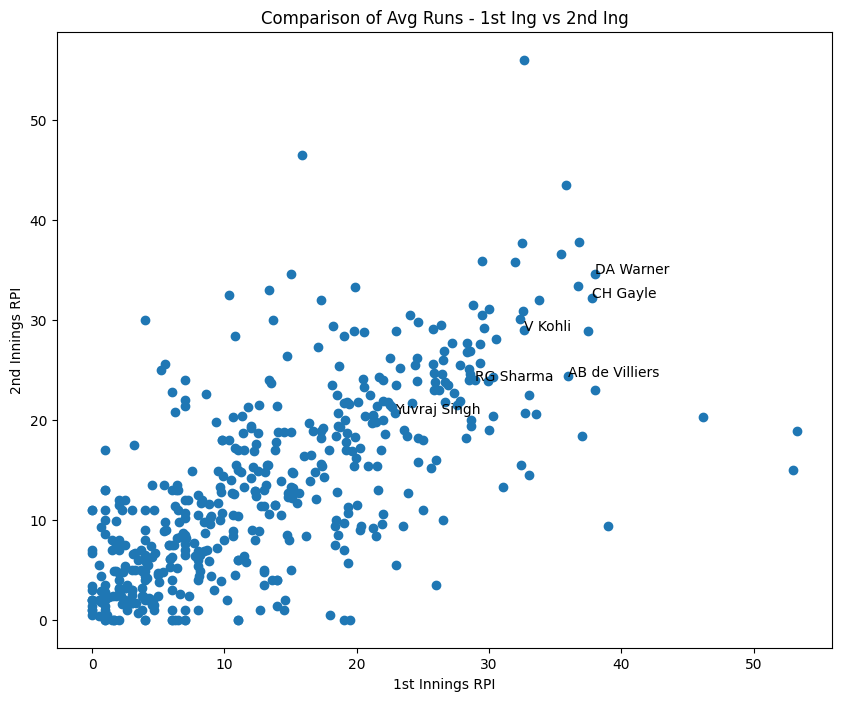

In [ ]:
plt.figure(figsize = (10, 8))
plt.scatter(comp['1st_RPI'], comp['2nd_RPI'] )
plt.xlabel('1st Innings RPI')
plt.ylabel('2nd Innings RPI')
plt.title('Comparison of Avg Runs - 1st Ing vs 2nd Ing')

annotations=list(comp['Batsman'])
selected_players = ['CH Gayle', 'V Kohli', 'AB de Villiers', 'DA Warner', 'RG Sharma', 'Yuvraj Singh']

for i, label in enumerate(annotations):
    if label in selected_players:
        plt.annotate(label, (comp['1st_RPI'][i], comp['2nd_RPI'][i]))

plt.show()

In [ ]:
comp[comp['1st_RPI'] > 50]

,Batsman,1st_RPI,2nd_RPI
152,HM Amla,53.25,18.875
216,Kamran Akmal,53.00,15.000


# Part 2 - Performance by opposition

In [ ]:
def ByOpposition(df, current_opposition):

    df = df[df.bowling_team == current_opposition]
    df.reset_index(inplace = True, drop = True)

    df['isDots'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['Batsman'])['batsman_runs'].sum().reset_index()).groupby(['Batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'Runs'})
    innings = pd.DataFrame(df.groupby(['Batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'Innings'})
    balls = pd.DataFrame(df.groupby(['Batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'Balls'})
    dismissals = pd.DataFrame(df.groupby(['Batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'Dismissals'})

    Dots = pd.DataFrame(df.groupby(['Batsman'])['isDots'].sum()).reset_index().rename(columns = {'isDots':'Dots'})
    Ones = pd.DataFrame(df.groupby(['Batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'Ones'})
    Twos = pd.DataFrame(df.groupby(['Batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'Twos'})
    Threes = pd.DataFrame(df.groupby(['Batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'Threes'})
    Fours = pd.DataFrame(df.groupby(['Batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'Fours'})
    Sixes = pd.DataFrame(df.groupby(['Batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'Sixes'})

    df = pd.merge(innings, runs, on = 'Batsman').merge(balls, on = 'Batsman').merge(dismissals, on = 'Batsman').merge(Dots, on = 'Batsman').merge(Ones, on = 'Batsman').merge(Twos, on = 'Batsman').merge(Threes, on = 'Batsman').merge(Fours, on = 'Batsman').merge(Sixes, on = 'Batsman')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['Runs']/x['Balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['Balls'], x['Dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['Balls'], (x['Fours'] + x['Sixes'])), axis = 1)

    return df

In [ ]:
ByOpposition(Deliveries, 'Chennai Super Kings').head(5)

,Batsman,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Ashish Reddy,3,45,25,2,8,8,2,1,3,3,180.000000,15.00,12.5,4.166667
1,A Badoni,1,19,14,0,7,3,2,0,0,2,135.714286,19.00,14.0,7.000000
2,A Kumble,2,3,6,0,4,1,1,0,0,0,50.000000,1.50,6.0,6.000000
3,A Manohar,1,12,12,1,6,4,0,0,2,0,100.000000,12.00,12.0,6.000000
4,A Mishra,8,58,64,5,35,16,6,0,6,1,90.625000,7.25,12.8,9.142857


In [ ]:
Deliveries.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,Batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,total_runs,Penalty,dismissal_kind,player_dismissed,isDots,isOne,isTwo,isThree,isFour,isSix,Phase
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,0,0,0,0,1,0,Powerplay
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,4,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay


In [ ]:
selected_player = 'RG Shamra'

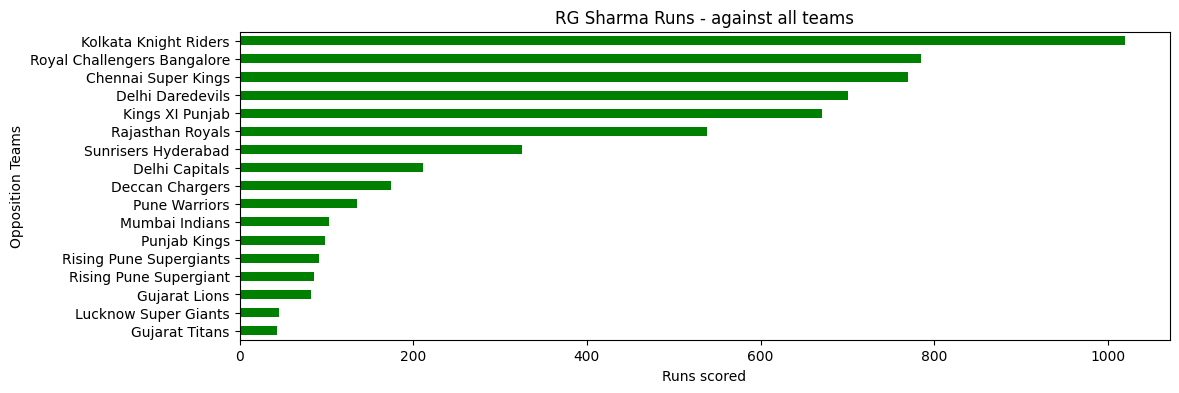

In [ ]:
plt.figure(figsize = (12, 4))
Deliveries[Deliveries.Batsman == 'RG Sharma'].groupby(['bowling_team'])['batsman_runs'].sum().sort_values().plot(kind = 'barh', color = 'g')
plt.title('RG Sharma Runs - against all teams')
plt.xlabel('Runs scored')
plt.ylabel('Opposition Teams')
plt.show()

# Part 3 - Venue Analysis

In [ ]:
def wintoss_winmatch(toss_decision, team1, team2, winner):
    if toss_decision == 'field':
        if team2 == winner:
            return True
        else:
            return False

    else:
        if team1 == winner:
            return True
        else:
            return False

In [ ]:
Matches['wintoss_winmatch'] = Matches.apply(lambda x: wintoss_winmatch(x['toss_decision'], x['team1'], x['team2'], x['winner']), axis = 1)


In [ ]:
Matches[['match_number', 'season', 'team1', 'team2', 'wintoss_winmatch']].head(50)


,match_number,season,team1,team2,wintoss_winmatch
0,1.0,2017,Sunrisers Hyderabad,Royal Challengers Bangalore,False
1,2.0,2017,Rising Pune Supergiant,Mumbai Indians,False
2,3.0,2017,Gujarat Lions,Kolkata Knight Riders,True
3,4.0,2017,Kings XI Punjab,Rising Pune Supergiant,False
4,5.0,2017,Royal Challengers Bangalore,Delhi Daredevils,True
5,6.0,2017,Sunrisers Hyderabad,Gujarat Lions,False
6,7.0,2017,Mumbai Indians,Kolkata Knight Riders,False
7,8.0,2017,Kings XI Punjab,Royal Challengers Bangalore,True
8,9.0,2017,Rising Pune Supergiant,Delhi Daredevils,True
9,10.0,2017,Mumbai Indians,Sunrisers Hyderabad,False


In [ ]:
print('% of wintoss-winmatch =', 100*len(Matches[Matches.wintoss_winmatch == 1])/len(Matches))


% of wintoss-winmatch = 52.73684210526316


In [ ]:
def isOut(player_dismissed):
    try:
        x = math.isnan(player_dismissed)
        return 0
    except:
        return 1

def venueAnalysis(mdf, df):

    runs = pd.DataFrame(df.groupby(['matchId', 'inning'])['total_runs'].sum().reset_index())
    runs['Id_Ing'] = runs.apply(lambda x: str(x['matchId']) + '-' + str(x['inning']), axis = 1)

    balls = pd.DataFrame(df.groupby(['matchId', 'inning'])['total_runs'].count().reset_index()).rename(columns = {'total_runs':'total_balls'})
    balls['Id_Ing'] = balls.apply(lambda x: str(x['matchId']) + '-' + str(x['inning']), axis = 1)

    df['isOut'] = df['player_dismissed'].apply(lambda x: isOut(x))
    outs = pd.DataFrame(df.groupby(['matchId', 'inning'])['isOut'].sum().reset_index()).rename(columns = {'isOut':'wickets'})
    outs['Id_Ing'] = outs.apply(lambda x: str(x['matchId']) + '-' + str(x['inning']), axis = 1)

    df = pd.merge(runs, balls[['Id_Ing', 'total_balls']], on = 'Id_Ing').merge(outs[['Id_Ing', 'wickets']], on = 'Id_Ing')

    mdf = mdf.rename(columns = {'id':'matchId'})
    df = pd.merge(df, mdf[['matchId', 'venue']], on = 'matchId')
    df = df[['matchId', 'venue', 'inning', 'total_runs', 'total_balls', 'wickets']]

    return df

In [ ]:
ven_df = venueAnalysis(Matches, Deliveries)

In [ ]:
ven_df.head()

,matchId,venue,inning,total_runs,total_balls,wickets
0,335982,M Chinnaswamy Stadium,1,239,124,3
1,335982,M Chinnaswamy Stadium,2,101,101,10
2,335983,"Punjab Cricket Association Stadium, Mohali",1,246,124,5
3,335983,"Punjab Cricket Association Stadium, Mohali",2,218,124,4
4,335984,Feroz Shah Kotla,1,136,122,8


In [ ]:
pd.DataFrame(ven_df.groupby('venue')['total_runs'].mean().sort_values(ascending = False)).rename(columns = {'total_runs':'Avg_Runs'}).reset_index().head(20)


,venue,Avg_Runs
0,"Eden Gardens, Kolkata",208.750000
1,"Arun Jaitley Stadium, Delhi",197.875000
2,Brabourne Stadium,184.950000
3,"Brabourne Stadium, Mumbai",180.911765
4,Punjab Cricket Association IS Bindra Stadium,180.900000
5,M.Chinnaswamy Stadium,178.600000
6,"Wankhede Stadium, Mumbai",175.370968
7,"Dr DY Patil Sports Academy, Mumbai",173.675000
8,Himachal Pradesh Cricket Association Stadium,170.777778
9,Green Park,170.000000


In [ ]:
def ByVenue(df, current_venue):

    df = df[df.venue == current_venue]
    df.reset_index(inplace = True, drop = True)
    df['isDots'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['Batsman'])['batsman_runs'].sum().reset_index()).groupby(['Batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'Runs'})
    innings = pd.DataFrame(df.groupby(['Batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'Innings'})
    balls = pd.DataFrame(df.groupby(['Batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'Balls'})
    dismissals = pd.DataFrame(df.groupby(['Batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'Dismissals'})

    Dots = pd.DataFrame(df.groupby(['Batsman'])['isDots'].sum()).reset_index().rename(columns = {'isDots':'Dots'})
    Ones = pd.DataFrame(df.groupby(['Batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'Ones'})
    Twos = pd.DataFrame(df.groupby(['Batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'Twos'})
    Threes = pd.DataFrame(df.groupby(['Batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'Threes'})
    Fours = pd.DataFrame(df.groupby(['Batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'Fours'})
    Sixes = pd.DataFrame(df.groupby(['Batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'Sixes'})

    df = pd.merge(innings, runs, on = 'Batsman').merge(balls, on = 'Batsman').merge(dismissals, on = 'Batsman').merge(Dots, on = 'Batsman').merge(Ones, on = 'Batsman').merge(Twos, on = 'Batsman').merge(Threes, on = 'Batsman').merge(Fours, on = 'Batsman').merge(Sixes, on = 'Batsman')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['Runs']/x['Balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['Balls'], x['Dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['Balls'], (x['Fours'] + x['Sixes'])), axis = 1)

    return df


In [ ]:
Matches.rename(columns = {'id':'matchId'}, inplace = True)

In [ ]:
combined_data = Deliveries.merge(Matches[['matchId', 'venue']], on = 'matchId', how = 'left')

In [ ]:
combined_data.head()

,matchId,inning,over_ball,over,ball,batting_team,bowling_team,Batsman,non_striker,bowler,batsman_runs,extras,isWide,isNoBall,Byes,LegByes,total_runs,Penalty,dismissal_kind,player_dismissed,isDots,isOne,isTwo,isThree,isFour,isSix,Phase,isOut,venue
0,1082591,1,0.1,0,1,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"
1,1082591,1,0.2,0,2,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"
2,1082591,1,0.3,0,3,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,4,0,NaN,NaN,NaN,NaN,4,NaN,NaN,NaN,0,0,0,0,1,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"
3,1082591,1,0.4,0,4,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,0,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"
4,1082591,1,0.5,0,5,Sunrisers Hyderabad,Royal Challengers Bangalore,DA Warner,S Dhawan,TS Mills,0,2,2.0,NaN,NaN,NaN,4,NaN,NaN,NaN,1,0,0,0,0,0,Powerplay,0,"Rajiv Gandhi International Stadium, Uppal"


In [ ]:
current_venue = 'MA Chidambaram Stadium'

In [ ]:
df = ByVenue(combined_data, current_venue)

In [ ]:
df.head()

,Batsman,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB
0,A Mishra,1,8,11,1,6,4,0,0,1,0,72.727273,8.0,11.0,11.0
1,AB de Villiers,1,9,10,1,4,3,3,0,0,0,90.000000,9.0,10.0,10.0
2,AD Russell,2,138,82,0,34,26,2,0,6,14,168.292683,69.0,82.0,4.1
3,AM Rahane,1,0,2,1,2,0,0,0,0,0,0.000000,0.0,2.0,2.0
4,AR Patel,1,9,9,1,3,5,0,0,1,0,100.000000,9.0,9.0,9.0


# Problem Statement: How good is player X against MI in Wankhede when they’re playing 3 spinners?
## Filters in our problem statements:

*   Stadium = 'MA Chidambaram Stadium'
*   Phase = 'Middle Overs'

*   Oppostion Team = 'Chennai Super Kings'





In [ ]:
def ByCustom(df, current_venue, current_phase, current_opposition):

    df = df[df.venue == current_venue]
    df = df[df.Phase == current_phase]
    df = df[df.bowling_team == current_opposition]

    df.reset_index(inplace = True, drop = True)
    df = df[df.venue == current_venue]
    df.reset_index(inplace = True, drop = True)
    df['isDots'] = df['batsman_runs'].apply(lambda x: 1 if x == 0 else 0)
    df['isOne'] = df['batsman_runs'].apply(lambda x: 1 if x == 1 else 0)
    df['isTwo'] = df['batsman_runs'].apply(lambda x: 1 if x == 2 else 0)
    df['isThree'] = df['batsman_runs'].apply(lambda x: 1 if x == 3 else 0)
    df['isFour'] = df['batsman_runs'].apply(lambda x: 1 if x == 4 else 0)
    df['isSix'] = df['batsman_runs'].apply(lambda x: 1 if x == 6 else 0)

    runs = pd.DataFrame(df.groupby(['Batsman'])['batsman_runs'].sum().reset_index()).groupby(['Batsman'])['batsman_runs'].sum().reset_index().rename(columns={'batsman_runs':'Runs'})
    innings = pd.DataFrame(df.groupby(['Batsman'])['matchId'].apply(lambda x: len(list(np.unique(x)))).reset_index()).rename(columns = {'matchId':'Innings'})
    balls = pd.DataFrame(df.groupby(['Batsman'])['matchId'].count()).reset_index().rename(columns = {'matchId':'Balls'})
    dismissals = pd.DataFrame(df.groupby(['Batsman'])['player_dismissed'].count()).reset_index().rename(columns = {'player_dismissed':'Dismissals'})

    Dots = pd.DataFrame(df.groupby(['Batsman'])['isDots'].sum()).reset_index().rename(columns = {'isDots':'Dots'})
    Ones = pd.DataFrame(df.groupby(['Batsman'])['isOne'].sum()).reset_index().rename(columns = {'isOne':'Ones'})
    Twos = pd.DataFrame(df.groupby(['Batsman'])['isTwo'].sum()).reset_index().rename(columns = {'isTwo':'Twos'})
    Threes = pd.DataFrame(df.groupby(['Batsman'])['isThree'].sum()).reset_index().rename(columns = {'isThree':'Threes'})
    Fours = pd.DataFrame(df.groupby(['Batsman'])['isFour'].sum()).reset_index().rename(columns = {'isFour':'Fours'})
    Sixes = pd.DataFrame(df.groupby(['Batsman'])['isSix'].sum()).reset_index().rename(columns = {'isSix':'Sixes'})

    df = pd.merge(innings, runs, on = 'Batsman').merge(balls, on = 'Batsman').merge(dismissals, on = 'Batsman').merge(Dots, on = 'Batsman').merge(Ones, on = 'Batsman').merge(Twos, on = 'Batsman').merge(Threes, on = 'Batsman').merge(Fours, on = 'Batsman').merge(Sixes, on = 'Batsman')

    #StrikeRate
    df['SR'] = df.apply(lambda x: 100*(x['Runs']/x['Balls']), axis = 1)

    #runs per innings
    df['RPI'] = df.apply(lambda x: x['Runs']/x['Innings'], axis = 1)

    #balls per dismissals
    df['BPD'] = df.apply(lambda x: balls_per_dismissal(x['Balls'], x['Dismissals']), axis = 1)

    #balls per boundary
    df['BPB'] = df.apply(lambda x: balls_per_boundary(x['Balls'], (x['Fours'] + x['Sixes'])), axis = 1)

    return df

In [ ]:
df = ByCustom(combined_data, 'MA Chidambaram Stadium', 'Middle', 'Chennai Super Kings')

In [ ]:
df['dot_percentage'] = df.apply(lambda x: x['Dots']/x['Balls'], axis = 1)

In [ ]:
df.head(2)

,Batsman,Innings,Runs,Balls,Dismissals,Dots,Ones,Twos,Threes,Fours,Sixes,SR,RPI,BPD,BPB,dot_percentage
0,A Mishra,1,8,9,0,4,4,0,0,1,0,88.888889,8.0,9.0,9.0,0.444444
1,AB de Villiers,1,2,2,1,1,0,1,0,0,0,100.000000,2.0,2.0,2.0,0.500000


In [ ]:
wt_sr, wt_rpi, wt_bpd, wt_dot_percentage = 0.13, 0.27, 0.16, 0.45


In [ ]:
df = df[(df.Balls >= 20)]

# Calculation - Normalizing all values to same dimensions

In [ ]:
#step1: square of all values
df['calc_SR'] = df['SR'].apply(lambda x: x*x)
df['calc_RPI'] = df['RPI'].apply(lambda x: x*x)
df['calc_BPD'] = df['BPD'].apply(lambda x: x*x)
df['calc_dot_percentage'] = df['dot_percentage'].apply(lambda x: x*x)

sq_sr, sq_rpi, sq_bpd, sq_dot_percentage = np.sqrt(df[['calc_SR','calc_RPI', 'calc_BPD', 'calc_dot_percentage']].sum(axis = 0))

df['calc_SR'] = df['calc_SR'].apply(lambda x: x/sq_sr)
df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x/sq_rpi)
df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x/sq_bpd)
df['calc_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: x/sq_dot_percentage)

df['calc_SR'] = df['calc_SR'].apply(lambda x: x*wt_sr)
df['calc_RPI'] = df['calc_RPI'].apply(lambda x: x*wt_rpi)
df['calc_BPD'] = df['calc_BPD'].apply(lambda x: x*wt_bpd)
df['calc_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: x*wt_dot_percentage)

best_sr, worst_sr = max(df['calc_SR']), min(df['calc_SR'])
best_rpi, worst_rpi = max(df['calc_RPI']), min(df['calc_RPI'])
best_bpd, worst_bpd = max(df['calc_BPD']), min(df['calc_BPD'])
best_dot_percentage, worst_dot_percentage = min(df['calc_dot_percentage']), max(df['calc_dot_percentage'])

# Calculation - Comparision against the best & worst values

In [ ]:
df['dev_best_SR'] = df['calc_SR'].apply(lambda x: (x-best_sr)*(x-best_sr))
df['dev_best_RPI'] = df['calc_RPI'].apply(lambda x: (x-best_rpi)*(x-best_rpi))
df['dev_best_BPD'] = df['calc_BPD'].apply(lambda x: (x-best_bpd)*(x-best_bpd))
df['dev_best_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-best_dot_percentage)*(x-best_dot_percentage))

df['dev_best_sqrt'] = df.apply(lambda x: x['dev_best_SR'] + x['dev_best_RPI'] + x['dev_best_BPD'] + x['dev_best_dot_percentage'], axis = 1)

df['dev_worst_SR'] = df['calc_SR'].apply(lambda x: (x-worst_sr)*(x-worst_sr))
df['dev_worst_RPI'] = df['calc_RPI'].apply(lambda x: (x-worst_rpi)*(x-worst_rpi))
df['dev_worst_BPD'] = df['calc_BPD'].apply(lambda x: (x-worst_bpd)*(x-worst_bpd))
df['dev_worst_dot_percentage'] = df['calc_dot_percentage'].apply(lambda x: (x-worst_dot_percentage)*(x-worst_dot_percentage))

df['dev_worst_sqrt'] = df.apply(lambda x: x['dev_worst_SR'] + x['dev_worst_RPI'] + x['dev_worst_BPD'] + x['dev_worst_dot_percentage'], axis = 1)

# Final Step - Overall score for each player ( values from 0 - 1)

In [ ]:
df['score'] = df.apply(lambda x: x['dev_worst_sqrt']/(x['dev_worst_sqrt'] + x['dev_best_sqrt']), axis = 1)

In [ ]:
df[['Batsman', 'score']]

,Batsman,score
2,AD Russell,0.448976
11,Ishan Kishan,0.000462
14,KD Karthik,0.055578
16,KL Rahul,0.103740
18,MK Pandey,0.734832
24,RG Sharma,0.939865
28,SA Yadav,0.900919
30,SN Khan,0.396727
32,SPD Smith,0.000232


# End Result: Top players for our required role

In [ ]:
df[[ 'Batsman','Innings', 'Runs', 'Balls', 'Dismissals', 'Dots', 'SR',  'RPI', 'score']].sort_values(['score'], ascending = False).reset_index(drop = True).head()


,Batsman,Innings,Runs,Balls,Dismissals,Dots,SR,RPI,score
0,RG Sharma,1,47,30,0,11,156.666667,47.0,0.939865
1,SA Yadav,1,43,28,0,6,153.571429,43.0,0.900919
2,MK Pandey,1,37,26,0,5,142.307692,37.0,0.734832
3,AD Russell,2,56,47,0,21,119.148936,28.0,0.448976
4,SN Khan,1,36,32,0,11,112.500000,36.0,0.396727
